In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM

In [15]:
(x_train, y_train), (x_test,y_test) = imdb.load_data(num_words=10000)

In [16]:
x_train = sequence.pad_sequences(x_train, maxlen=150)
x_test = sequence.pad_sequences(x_test, maxlen=150)

In [32]:
N = 16
K = 50

In [34]:
model = Sequential()
model.add(Embedding(10000,N))
model.add(Dropout(0.5))
model.add(LSTM(K))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
dropout_7 (Dropout)          (None, None, 16)          0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                13400     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 173,451
Trainable params: 173,451
Non-trainable params: 0
_________________________________________________________________


In [35]:
train_history = model.fit(x_train, y_train, validation_split=0.4,batch_size=32, epochs=5)

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 133s 9ms/step - loss: 0.5035 - acc: 0.7397 - val_loss: 0.3472 - val_acc: 0.8552
Epoch 2/5
15000/15000 [==============================] - 125s 8ms/step - loss: 0.2917 - acc: 0.8803 - val_loss: 0.3185 - val_acc: 0.8668
Epoch 3/5
15000/15000 [==============================] - 131s 9ms/step - loss: 0.2264 - acc: 0.9118 - val_loss: 0.3364 - val_acc: 0.8634
Epoch 4/5
15000/15000 [==============================] - 124s 8ms/step - loss: 0.1880 - acc: 0.9307 - val_loss: 0.4003 - val_acc: 0.8511
Epoch 5/5
15000/15000 [==============================] - 127s 8ms/step - loss: 0.1636 - acc: 0.9401 - val_loss: 0.3906 - val_acc: 0.8628


In [36]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

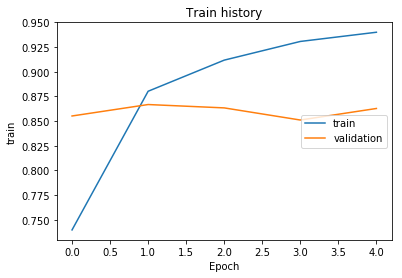

In [37]:
show_train_history(train_history,'acc','val_acc')

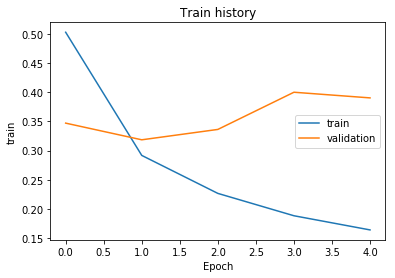

In [38]:
show_train_history(train_history,'loss','val_loss')

In [39]:
import pandas as pd

In [40]:
prediction_test = model.predict_classes(x_test)
prediction_train = model.predict_classes(x_train)
scores_test = model.evaluate(x_test,y_test)
print(scores_test[1])
scores_train = model.evaluate(x_train,y_train)
print(scores_train[1])

25000/25000 [==============================] - 36s 1ms/step
0.85316
25000/25000 [==============================] - 36s 1ms/step
0.9298
